# Importation des librairies

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from plotly import graph_objects as go
import json
from json import load
from sqlalchemy import create_engine
import chart_studio.plotly as py
#chart_studio.tools.set_credentials_file (username = 'FIDELIO', api_key = 'PGNN8cBwEInzoVXnbW8z')

In [3]:
#On importe le fichier json pour rendre anonyme l'entrée de nos données personnelles lors de la connexion avec la base de données 
fichierConfig = "../data/config.json" 
with open(fichierConfig) as fichier:config = json.load(fichier)["mysql"]

In [4]:
engine = create_engine('mysql+' + config["connector"] + '://' + config["user"] + ":" + config["password"] + "@" + config["host"] + ":" + config["port"] + "/" + config["bdd"], echo=True)

In [5]:
#On place dans une variable les jointures des tables catégorie socio-pro, population, ville et age
jointure_csp_age_ville = """SELECT * FROM categorie_socio_pro JOIN population
ON categorie_socio_pro.csp_id = population.po_csp_id_fk
JOIN ville
ON population.po_vi_id_fk = ville.vi_id
JOIN age 
ON age.ag_id = population.po_ag_id_fk;"""

#On charge la variable que l'on vient de créer en la connectant à la BDD
df = pd.read_sql_query(jointure_csp_age_ville, engine)
df

2020-12-28 17:47:33,121 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2020-12-28 17:47:33,122 INFO sqlalchemy.engine.base.Engine {}
2020-12-28 17:47:33,257 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2020-12-28 17:47:33,259 INFO sqlalchemy.engine.base.Engine {}
2020-12-28 17:47:33,276 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2020-12-28 17:47:33,277 INFO sqlalchemy.engine.base.Engine {}
2020-12-28 17:47:33,282 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2020-12-28 17:47:33,283 INFO sqlalchemy.engine.base.Engine {}
2020-12-28 17:47:33,305 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2020-12-28 17:47:33,306 INFO sqlalchemy.engine.base.Engine {}
2020-12-28 17:47:33,310 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2020-12-28 17:47:33,311 INFO sqlalchemy.engine.base.E

,csp_id,csp_nom,po_id,po_source,po_annee,po_nbre_pop,po_csp_id_fk,po_ag_id_fk,po_vi_id_fk,vi_id,vi_nom,ag_id,ag_tranche_age
0,1,Agriculteurs exploitants,3,"Insee, Recensement de la population (RP), expl...",2017,0,1,1,1,1,Cannes,1,15 a 24
1,2,Artisans. commerçants. chefs entreprise,8,"Insee, Recensement de la population (RP), expl...",2017,40,2,1,1,1,Cannes,1,15 a 24
2,3,Cadres et professions intellectuelles supérieures,13,"Insee, Recensement de la population (RP), expl...",2017,72,3,1,1,1,Cannes,1,15 a 24
3,4,Professions intermédiaires,18,"Insee, Recensement de la population (RP), expl...",2017,477,4,1,1,1,Cannes,1,15 a 24
4,5,Employés,23,"Insee, Recensement de la population (RP), expl...",2017,1324,5,1,1,1,Cannes,1,15 a 24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,5,Employés,114,"Insee, Recensement de la population (RP), expl...",2017,52,5,3,5,5,Theoule-Sur-Mer,3,0
131,6,Ouvriers,119,"Insee, Recensement de la population (RP), expl...",2017,5,6,3,5,5,Theoule-Sur-Mer,3,0
132,7,Retraités,124,"Insee, Recensement de la population (RP), expl...",2017,429,7,3,5,5,Theoule-Sur-Mer,3,0
133,8,Autres personnes sans activité professionnelle,129,"Insee, Recensement de la population (RP), expl...",2017,64,8,3,5,5,Theoule-Sur-Mer,3,0


In [6]:
#On place dans une variable les jointures des tables ville, entreprise et secteur d'activité
jointure_ville_entreprise_sa = """SELECT * FROM ville
JOIN entreprise
ON ville.vi_id = entreprise.en_vi_id_fk
JOIN secteur_activite
ON entreprise.en_sa_id_fk = secteur_activite.sa_id;"""

#On charge la variable que l'on vient de créer en la connectant à la BDD
df1 = pd.read_sql_query(jointure_ville_entreprise_sa, engine)
df1

2020-12-28 17:47:33,551 INFO sqlalchemy.engine.base.Engine SELECT * FROM ville
JOIN entreprise
ON ville.vi_id = entreprise.en_vi_id_fk
JOIN secteur_activite
ON entreprise.en_sa_id_fk = secteur_activite.sa_id;
2020-12-28 17:47:33,553 INFO sqlalchemy.engine.base.Engine {}


,vi_id,vi_nom,en_id,en_nom,en_siren,en_nic,en_adresse,en_code_postal,en_vi_id_fk,en_sa_id_fk,sa_id,sa_nom
0,1,Cannes,30431958528,None,304319585,28,av pierre de coubertin,6150,1,1,1,"Agriculture, sylviculture et pêche"
1,1,Cannes,31056075013,None,310560750,13,46 bd du perier,6400,1,1,1,"Agriculture, sylviculture et pêche"
2,1,Cannes,32668413113,groupe forestier de la montagne orpiere,326684131,13,26 av coste belle,6400,1,1,1,"Agriculture, sylviculture et pêche"
3,1,Cannes,32823582536,None,328235825,36,9 rue lalanne,6400,1,1,1,"Agriculture, sylviculture et pêche"
4,1,Cannes,33135939812,None,331359398,12,che de l abadie,6150,1,1,1,"Agriculture, sylviculture et pêche"
...,...,...,...,...,...,...,...,...,...,...,...,...
54637,5,Theoule-Sur-Mer,83815350015,None,838153500,15,1 bd eugene de quay,6590,5,19,19,Autres activités de services
54638,5,Theoule-Sur-Mer,84878998813,ass amicale des sapeurs pompiers de theoule su...,848789988,13,42 av de lerins,6590,5,19,19,Autres activités de services
54639,5,Theoule-Sur-Mer,84972285512,ultime espoir,849722855,12,25 av van loo,6590,5,19,19,Autres activités de services
54640,5,Theoule-Sur-Mer,85086739111,None,850867391,11,10 av du trayas,6590,5,19,19,Autres activités de services


In [7]:
#On place dans une variable les jointures des tables ville, logement et catégorie logement
jointure_ville_logement_cl = """SELECT * FROM ville
JOIN logement
ON ville.vi_id = logement.lo_vi_id_fk
JOIN categorie_logement
ON logement.lo_cl_id_fk = categorie_logement.cl_id;"""

#On charge la variable que l'on vient de créer en la connectant à la BDD
df2 = pd.read_sql_query(jointure_ville_logement_cl, engine)
df2

2020-12-28 17:47:35,843 INFO sqlalchemy.engine.base.Engine SELECT * FROM ville
JOIN logement
ON ville.vi_id = logement.lo_vi_id_fk
JOIN categorie_logement
ON logement.lo_cl_id_fk = categorie_logement.cl_id;
2020-12-28 17:47:35,847 INFO sqlalchemy.engine.base.Engine {}


,vi_id,vi_nom,lo_id,lo_nbre,lo_vi_id_fk,lo_cl_id_fk,cl_id,cl_nom
0,1,Cannes,4,37735,1,1,1,Résidences principales
1,2,Le Cannet,3,21276,2,1,1,Résidences principales
2,3,Mougins,2,8403,3,1,1,Résidences principales
3,5,Theoule-Sur-Mer,5,694,5,1,1,Résidences principales
4,1,Cannes,9,31433,1,2,2,Résid. secondaires et log. occasionnels
5,2,Le Cannet,8,4104,2,2,2,Résid. secondaires et log. occasionnels
6,3,Mougins,7,1983,3,2,2,Résid. secondaires et log. occasionnels
7,4,Mandelieu-La-Napoule,6,8694,4,2,2,Résid. secondaires et log. occasionnels
8,5,Theoule-Sur-Mer,10,2564,5,2,2,Résid. secondaires et log. occasionnels
9,1,Cannes,14,2096,1,3,3,Logements vacants


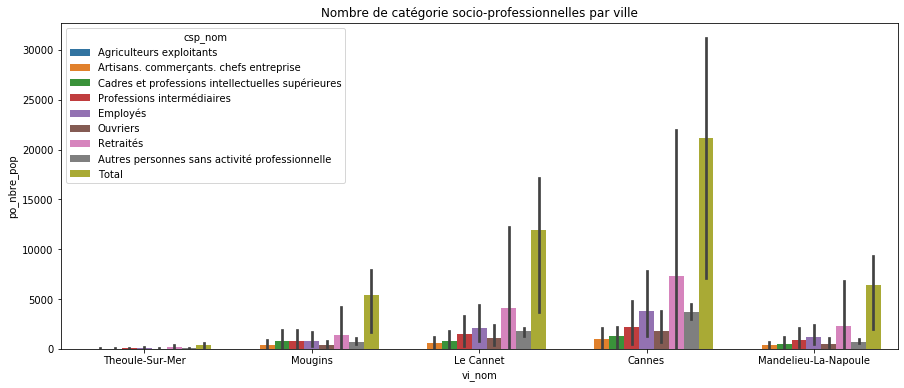

In [8]:
#Diagramme à barre présentant le nombre de catégories socio-professionnelles par ville de l'agglomération en 
#fonction du nombre de population par ville
plt.figure(figsize = [15, 6])
plt.title("Nombre de catégorie socio-professionnelles par ville")
sns.barplot(x="vi_nom", hue="csp_nom", y="po_nbre_pop", data=df, order=df['vi_nom'].value_counts().keys())

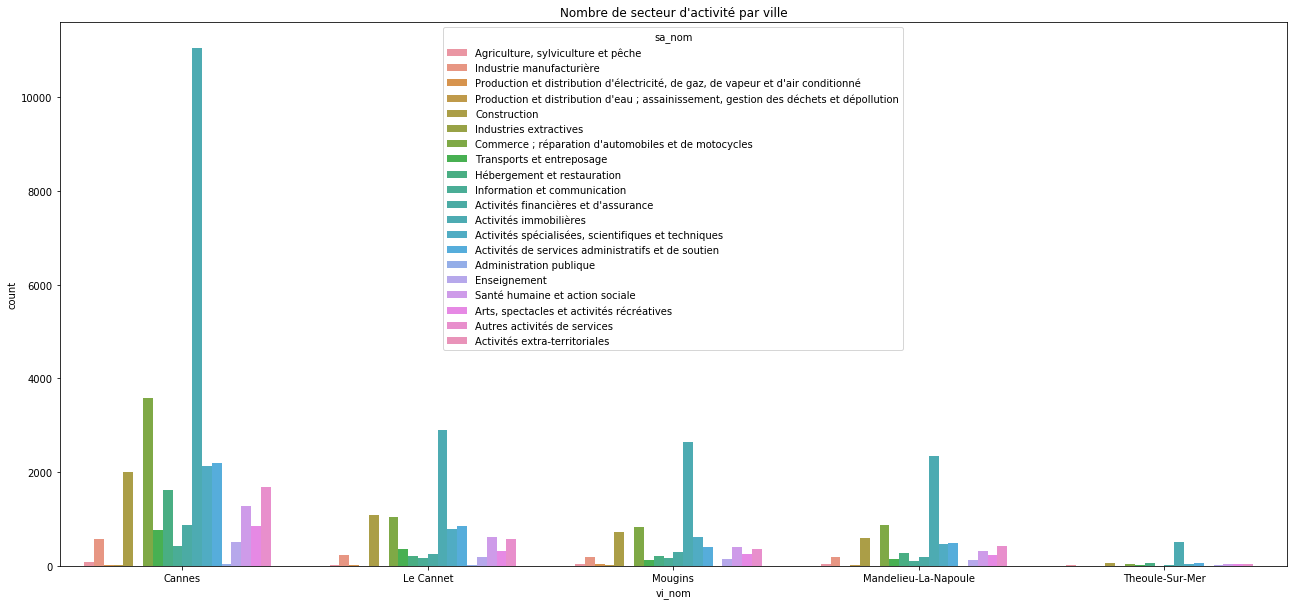

In [10]:
#Diagramme à barre présentant le nombre de secteurs d'activité par ville de l'agglomération
plt.figure(figsize = [22, 10])
plt.title("Nombre de secteur d'activité par ville")
sns.countplot(x="vi_nom", hue="sa_nom", data=df1, order=df1['vi_nom'].value_counts().keys())

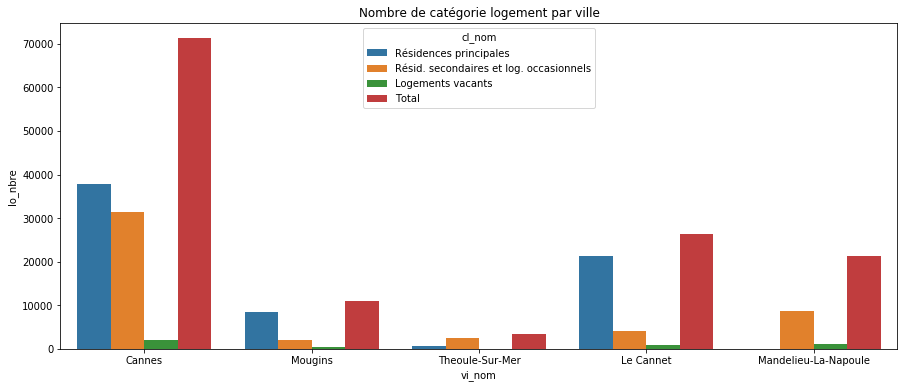

In [11]:
#Diagramme à barre présentant le nombre de catégories logement par ville de l'agglomération
plt.figure(figsize = [15, 6])
plt.title("Nombre de catégorie logement par ville")
sns.barplot(x="vi_nom", hue="cl_nom", y="lo_nbre", data=df2, order=df2['vi_nom'].value_counts().keys())

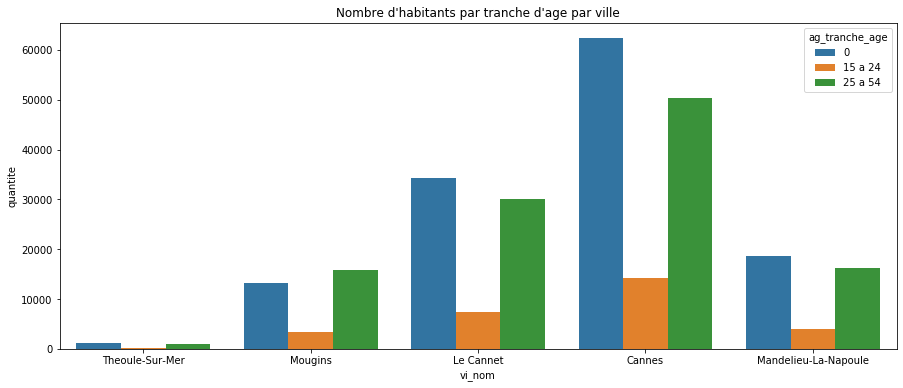

In [12]:
#Diagramme à barre présentant le nombre d'habitants par tranche d'age par ville de l'agglomération
df3 = df.groupby(by=["vi_nom", "ag_tranche_age"])["po_nbre_pop"].sum().reset_index(name="quantite")

plt.figure(figsize = [15, 6])
plt.title("Nombre d'habitants par tranche d'age par ville")
sns.barplot(x="vi_nom", hue="ag_tranche_age", y="quantite", data=df3, order=df['vi_nom'].value_counts().keys())

In [13]:
#Diagramme à barre présentant le nombre d'habitants par tranche d'age par ville de l'agglomération
graphHabAge = px.bar(df3, x="vi_nom", y="quantite", color='ag_tranche_age', title="Nombre d'habitants par tranche d'age par ville")
py.iplot(graphHabAge, filename='jupyter-styled_bar')

In [14]:
fig = go.Figure()
df4 = """SELECT SUM(po_nbre_pop) as nombre, csp_nom as csp, ag_tranche_age as age 
FROM population 
JOIN categorie_socio_pro ON population.po_csp_id_fk = categorie_socio_pro.csp_id 
JOIN age ON population.po_ag_id_fk = age.ag_id where csp_nom not in ('total') 
GROUP BY csp, age 
ORDER BY csp DESC, nombre 
ASC;"""

df4 = pd.read_sql_query(df4, engine)
df4

2020-12-28 17:47:49,969 INFO sqlalchemy.engine.base.Engine SELECT SUM(po_nbre_pop) as nombre, csp_nom as csp, ag_tranche_age as age 
FROM population 
JOIN categorie_socio_pro ON population.po_csp_id_fk = categorie_socio_pro.csp_id 
JOIN age ON population.po_ag_id_fk = age.ag_id where csp_nom not in ('total') 
GROUP BY csp, age 
ORDER BY csp DESC, nombre 
ASC;
2020-12-28 17:47:49,970 INFO sqlalchemy.engine.base.Engine {}


,nombre,csp,age
0,0.0,Retraités,15 a 24
1,205.0,Retraités,25 a 54
2,45741.0,Retraités,0
3,1173.0,Professions intermédiaires,15 a 24
4,2884.0,Professions intermédiaires,0
5,12209.0,Professions intermédiaires,25 a 54
6,1491.0,Ouvriers,15 a 24
7,1813.0,Ouvriers,0
8,8171.0,Ouvriers,25 a 54
9,2852.0,Employés,15 a 24


In [15]:
fig = px.funnel(df4, x='nombre', y='csp', color='age')

py.iplot(fig, filename='jupyter-styled_bar2')

In [24]:
requete = """SELECT collecte.poids, collecteur.codeInsee 
FROM collecte
INNER JOIN collecteur ON collecte.objectidCollecteur = collecteur.objectid;
"""

data_collecteur = pd.read_sql(requete, engine).groupby("codeInsee").sum()
data_collecteur

2020-12-28 19:22:22,676 INFO sqlalchemy.engine.base.Engine DESCRIBE `SELECT collecte.poids, collecteur.codeInsee 
FROM collecte
INNER JOIN collecteur ON collecte.objectidCollecteur = collecteur.objectid;
`
2020-12-28 19:22:22,678 INFO sqlalchemy.engine.base.Engine {}
2020-12-28 19:22:22,679 INFO sqlalchemy.engine.base.Engine ROLLBACK
2020-12-28 19:22:22,682 INFO sqlalchemy.engine.base.Engine SELECT collecte.poids, collecteur.codeInsee 
FROM collecte
INNER JOIN collecteur ON collecte.objectidCollecteur = collecteur.objectid;

2020-12-28 19:22:22,683 INFO sqlalchemy.engine.base.Engine {}


,poids
codeInsee,
06029,3509690
06030,1087639
06079,576650
06085,668520


In [33]:
#Diagramme à barre présentant le poids des collecteurs par ville
graphpoidscollecteur = px.bar(data_collecteur, x = data_collecteur.index, y="poids", title="Nombre ")
py.iplot(graphpoidscollecteur, filename='jupyter-styled_bar')